In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [3]:
df.nunique ()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [4]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [5]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [6]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       918.00     918.00 918.00   918.00        918.00
mean   53.51     132.40       198.80       0.23 136.81     0.89          0.55
std     9.43      18.51       109.38       0.42  25.46     1.07          0.50
min    28.00       0.00         0.00       0.00  60.00    -2.60          0.00
25%    47.00     120.00       173.25       0.00 120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00 156.00     1.50          1.00
max    77.00     200.00       603.00       1.00 202.00     6.20          1.00

In [9]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [11]:
colors = ['#FF3020','#FDD28A']

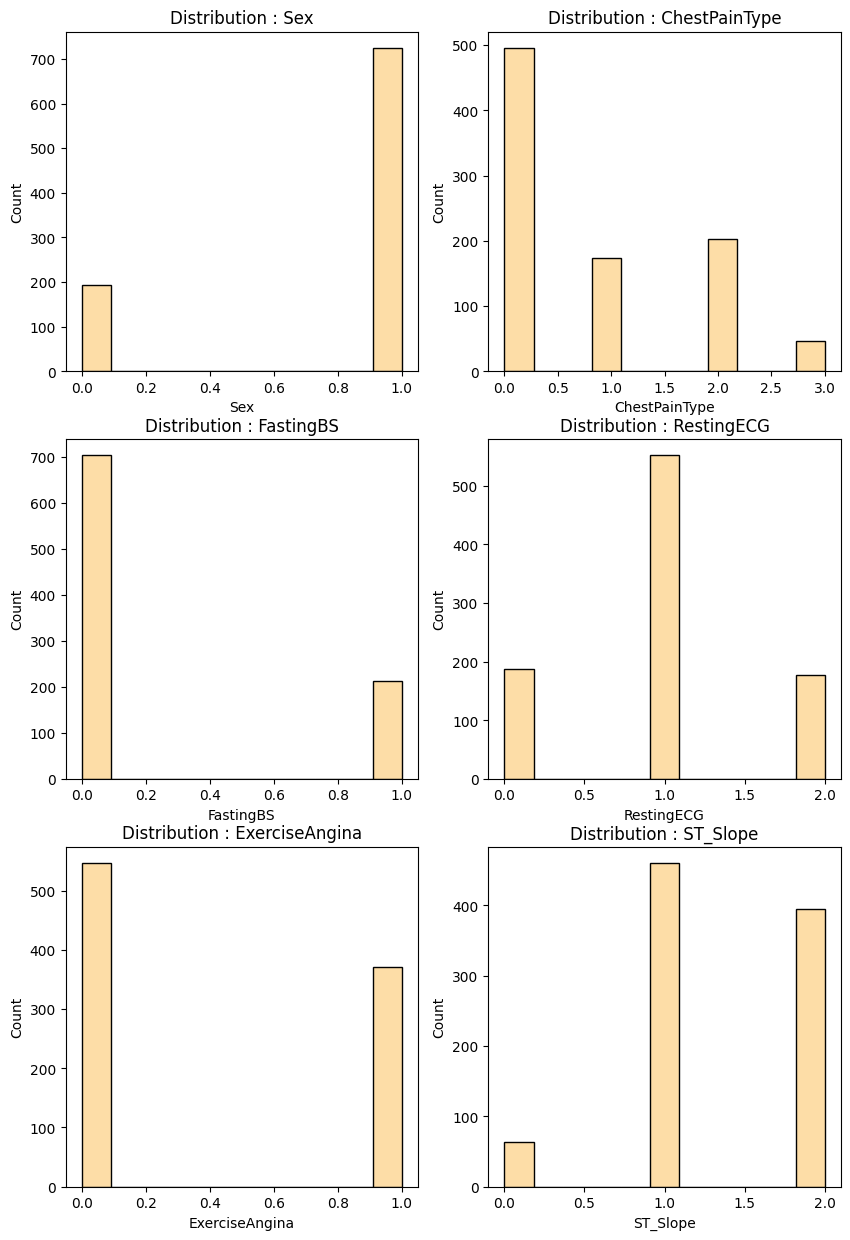

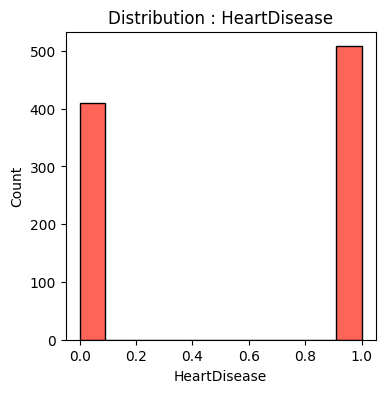

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.histplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[1]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4,4))
sns.histplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

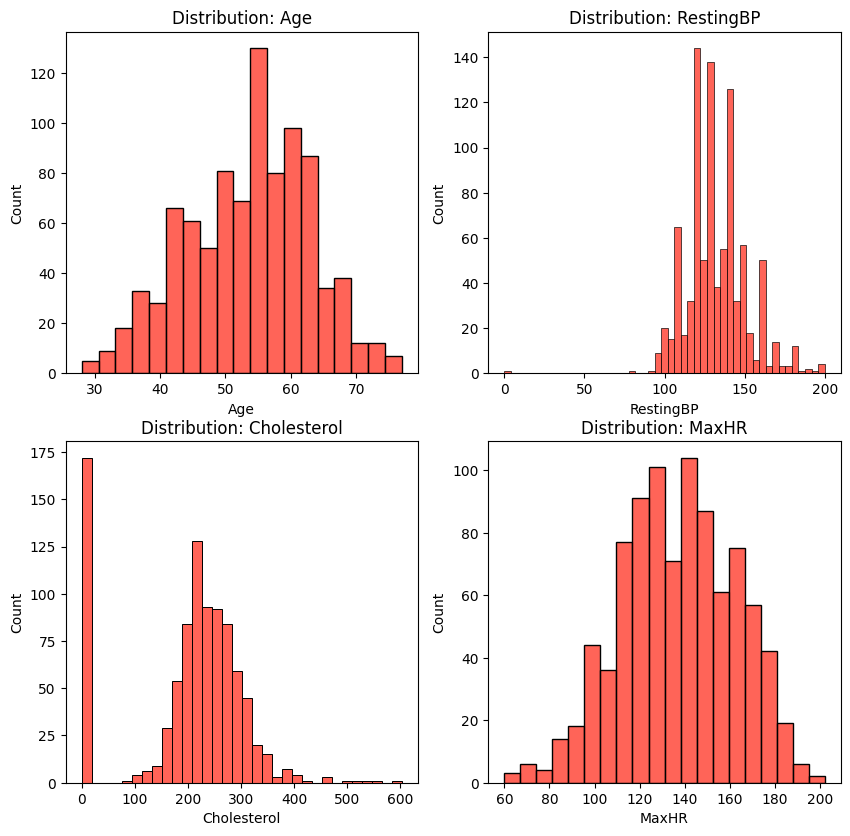

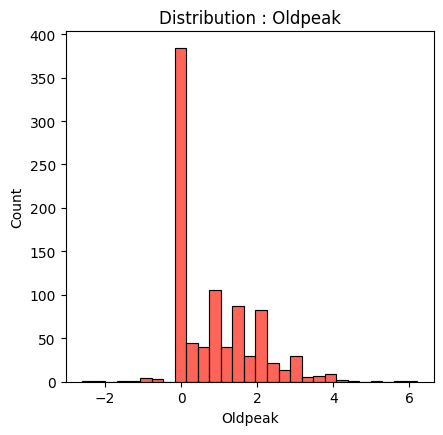

In [13]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.histplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.histplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

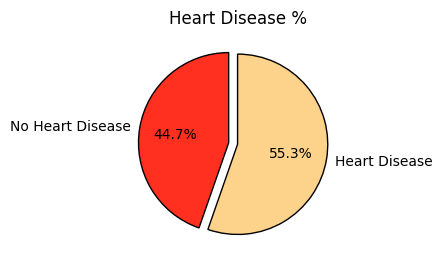

In [14]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

In [15]:
import ydata_profiling as pp

In [16]:
report = pp.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                
df['ChestPainType'] = df['ChestPainType'].replace({'ASY':0, 'NAP':1, 'ATA':-1, 'TA':-1})                      
df['RestingECG'] = df['RestingECG'].replace({'Normal':0, 'LVH':1, 'ST':-1})         
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':0, 'Y':1})                        
df['ST_Slope'] = df['ST_Slope'].replace({'Flat':0, 'Up':1, 'Down':-1})   

In [18]:
df.corr()

Age   Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
Age             1.00 -0.06           0.11       0.25        -0.10       0.20   
Sex            -0.06  1.00          -0.05      -0.01         0.20      -0.12   
ChestPainType   0.11 -0.05           1.00      -0.01        -0.10       0.05   
RestingBP       0.25 -0.01          -0.01       1.00         0.10       0.07   
Cholesterol    -0.10  0.20          -0.10       0.10         1.00      -0.26   
FastingBS       0.20 -0.12           0.05       0.07        -0.26       1.00   
RestingECG      0.01  0.07           0.03      -0.02         0.20      -0.09   
MaxHR          -0.38  0.19          -0.10      -0.11         0.24      -0.13   
ExerciseAngina  0.22 -0.19           0.11       0.16        -0.03       0.06   
Oldpeak         0.26 -0.11           0.08       0.16         0.05       0.05   
ST_Slope       -0.27  0.15          -0.13      -0.08         0.11      -0.18   
HeartDisease    0.28 -0.31           0.12       0.11        -0.23       0.27   

                RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  \
Age                   0.01  -0.38            0.22     0.26     -0.27   
Sex                   0.07   0.19           -0.19    -0.11      0.15   
ChestPainType         0.03  -0.10            0.11     0.08     -0.13   
RestingBP            -0.02  -0.11            0.16     0.16     -0.08   
Cholesterol           0.20   0.24           -0.03     0.05      0.11   
FastingBS            -0.09  -0.13            0.06     0.05     -0.18   
RestingECG            1.00   0.18           -0.08     0.02      0.01   
MaxHR                 0.18   1.00           -0.37    -0.16      0.34   
ExerciseAngina       -0.08  -0.37            1.00     0.41     -0.43   
Oldpeak               0.02  -0.16            0.41     1.00     -0.50   
ST_Slope              0.01   0.34           -0.43    -0.50      1.00   
HeartDisease         -0.06  -0.40            0.49     0.40     -0.56   

                HeartDisease  
Age                     0.28  
Sex                    -0.31  
ChestPainType           0.12  
RestingBP               0.11  
Cholesterol            -0.23  
FastingBS               0.27  
RestingECG             -0.06  
MaxHR                  -0.40  
ExerciseAngina          0.49  
Oldpeak                 0.40  
ST_Slope               -0.56  
HeartDisease            1.00

In [19]:
result = pd.DataFrame({'model' : ['Log Regression', 'SVC', 'DT', 'RF'], 
                       'train_score': 0, 'test_score': 0})
result

model  train_score  test_score
0  Log Regression            0           0
1             SVC            0           0
2              DT            0           0
3              RF            0           0

In [20]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [21]:
features = df[df.columns.drop(['HeartDisease'])].values
target = df['HeartDisease'].values
train_X, test_X, train_Y, test_Y = train_test_split(features, target, test_size = 0.20, random_state = 2)
print(train_X.shape, train_Y.shape)

(734, 11) (734,)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size = 0.20, random_state = 2)
print(x_train.shape, x_test.shape)

(587, 11) (147, 11)


In [23]:
import lightgbm as lgb

In [24]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [25]:
params = {
    'boosting': 'gbdt',
    'objective': 'binary',
    'num_leaves': 10,
    'num_class': 1
}

In [26]:
model_lgbm = lgb.train(params,
                train_set=lgb_train,
                valid_sets=lgb_eval,
                early_stopping_rounds=30)

[LightGBM] [Info] Number of positive: 324, number of negative: 263
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 587, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551959 -> initscore=0.208589
[LightGBM] [Info] Start training from score 0.208589
[1]	valid_0's binary_logloss: 0.61611
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.564719
[3]	valid_0's binary_logloss: 0.522797
[4]	valid_0's binary_logloss: 0.4873
[5]	valid_0's binary_logloss: 0.456776
[6]	valid_0's binary_logloss: 0.429199
[7]	valid_0's binary_logloss: 0.405434
[8]	valid_0's binary_logloss: 0.384454
[9]	valid_0's binary_logloss: 0.365235
[10]	valid_0's binary_logloss: 0.348289

In [27]:
y_pred = model_lgbm.predict(x_test)
y_pred

array([0.72247956, 0.03346493, 0.79381007, 0.03929821, 0.9345408 ,
       0.95814193, 0.98787928, 0.59333975, 0.02459068, 0.89079613,
       0.95961128, 0.01109426, 0.83903301, 0.98836684, 0.27036718,
       0.96202446, 0.958294  , 0.86552007, 0.96577848, 0.01735324,
       0.92807143, 0.94212586, 0.05418493, 0.00908452, 0.96012919,
       0.01016129, 0.97499445, 0.94982715, 0.77857013, 0.94125648,
       0.75476847, 0.83304865, 0.92296952, 0.01906996, 0.07550778,
       0.96135912, 0.9774883 , 0.58551215, 0.98298964, 0.12448381,
       0.44345633, 0.94725422, 0.93418752, 0.17406319, 0.1740702 ,
       0.9090701 , 0.40810653, 0.82757935, 0.18261929, 0.986486  ,
       0.95567368, 0.97999718, 0.00328514, 0.98707159, 0.88993066,
       0.12846399, 0.03438528, 0.12310212, 0.96619018, 0.74046681,
       0.03434873, 0.16704021, 0.91544644, 0.0110881 , 0.9147387 ,
       0.16497383, 0.01950853, 0.00947809, 0.99073138, 0.59461257,
       0.04943952, 0.43983002, 0.97520549, 0.79687774, 0.03095

In [28]:
print("ROC_AUC Score : ",round(roc_auc_score(y_test,y_pred),2))

ROC_AUC Score :  0.99


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

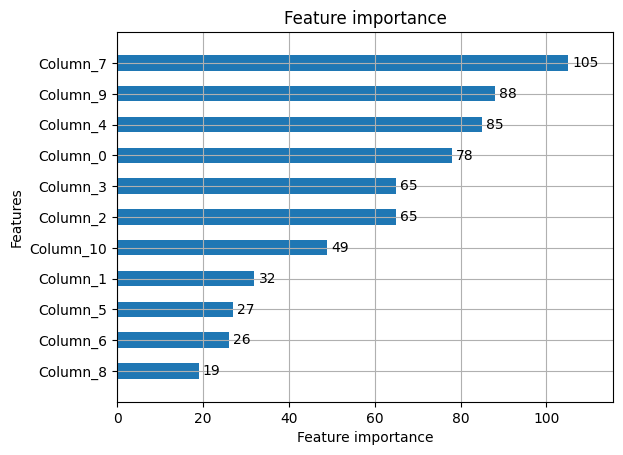

In [29]:
lgb.plot_importance(model_lgbm, height=0.5)

In [30]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy :", round(accuracy_score(y_test,prediction),2))
    print("Cross Validation Score : ",round(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean(),2))
    print("ROC_AUC Score : ",round(roc_auc_score(y_test,prediction),2))
    
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Accuracy : 0.88
Cross Validation Score :  0.88
ROC_AUC Score :  0.88


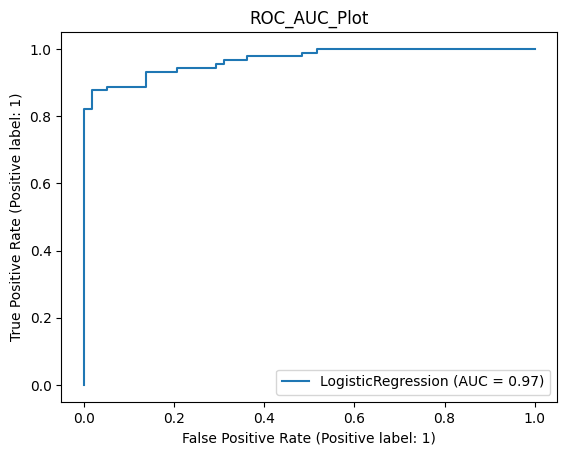

In [31]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

classifier_lr.fit(x_train,y_train)
prediction = classifier_lr.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Accuracy :", round(accuracy_score(y_test,prediction),2))
print("Cross Validation Score : ",round(cross_val_score(classifier_lr,x_train,y_train,cv = cv,scoring = 'roc_auc').mean(),2))
print("ROC_AUC Score : ",round(roc_auc_score(y_test,prediction),2))
    
RocCurveDisplay.from_estimator(classifier_lr, x_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()
#model(classifier_lr)
result.loc[result['model'] == 'Log Regression', 'train_score'] = round(accuracy_score(y_test,prediction),2)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        58
           1       0.92      0.89      0.90        89

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.89      0.88      0.88       147



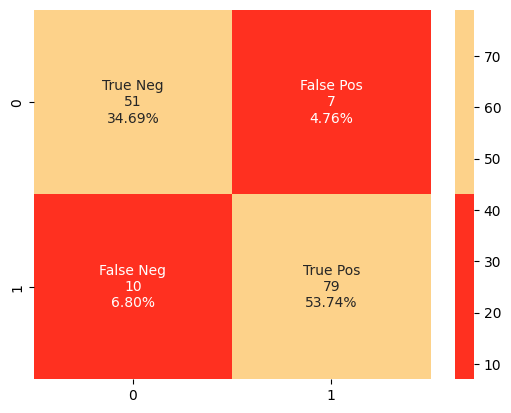

In [32]:
model_evaluation(classifier_lr)

In [33]:
result

model  train_score  test_score
0  Log Regression         0.88           0
1             SVC         0.00           0
2              DT         0.00           0
3              RF         0.00           0

Accuracy : 0.93
Cross Validation Score :  0.88
ROC_AUC Score :  0.92


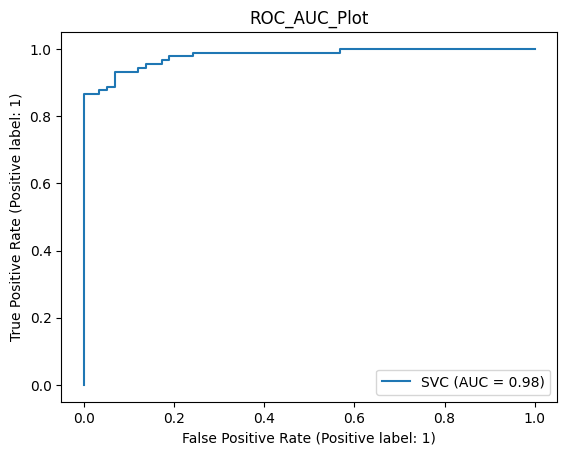

In [34]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1)

classifier_svc.fit(x_train,y_train)
prediction = classifier_svc.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Accuracy :", round(accuracy_score(y_test,prediction),2))
print("Cross Validation Score : ",round(cross_val_score(classifier_svc,x_train,y_train,cv = cv,scoring = 'roc_auc').mean(),2))
print("ROC_AUC Score : ",round(roc_auc_score(y_test,prediction),2))
    
RocCurveDisplay.from_estimator(classifier_svc, x_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

result.loc[result['model'] == 'SVC', 'train_score'] = round(accuracy_score(y_test,prediction),2)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.94      0.93      0.94        89

    accuracy                           0.93       147
   macro avg       0.92      0.92      0.92       147
weighted avg       0.93      0.93      0.93       147



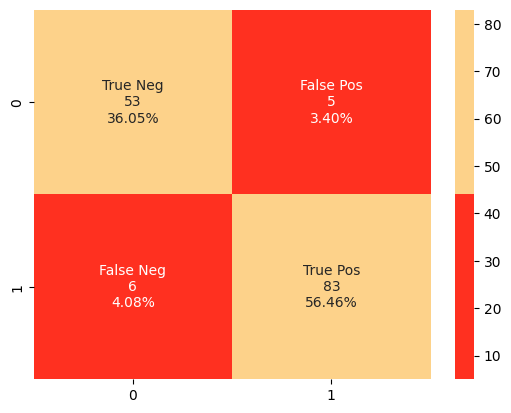

In [35]:
model_evaluation(classifier_svc)

In [36]:
result

model  train_score  test_score
0  Log Regression         0.88           0
1             SVC         0.93           0
2              DT         0.00           0
3              RF         0.00           0

Accuracy : 0.93
Cross Validation Score :  0.86
ROC_AUC Score :  0.92


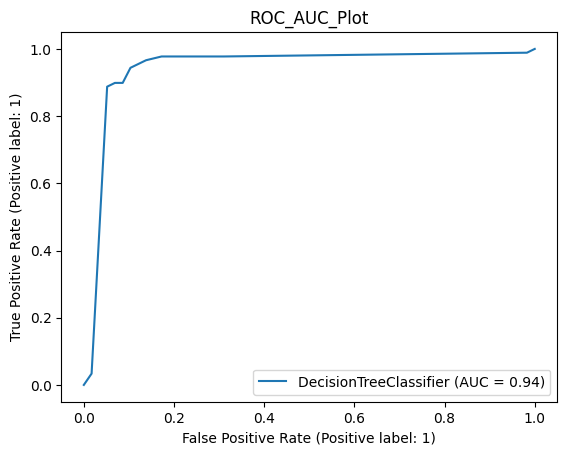

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

classifier_dt.fit(x_train,y_train)
prediction = classifier_dt.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Accuracy :", round(accuracy_score(y_test,prediction),2))
print("Cross Validation Score : ",round(cross_val_score(classifier_dt,x_train,y_train,cv = cv,scoring = 'roc_auc').mean(),2))
print("ROC_AUC Score : ",round(roc_auc_score(y_test,prediction),2))
    
RocCurveDisplay.from_estimator(classifier_dt, x_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()
result.loc[result['model'] == 'DT', 'train_score'] = round(accuracy_score(y_test,prediction),2)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.93      0.94      0.94        89

    accuracy                           0.93       147
   macro avg       0.92      0.92      0.92       147
weighted avg       0.93      0.93      0.93       147



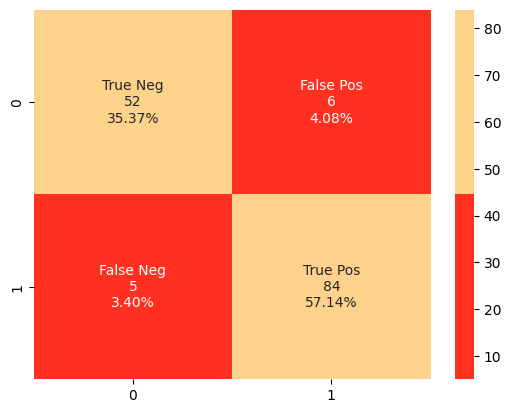

In [38]:
model_evaluation(classifier_dt)

In [39]:
result

model  train_score  test_score
0  Log Regression         0.88           0
1             SVC         0.93           0
2              DT         0.93           0
3              RF         0.00           0

Accuracy : 0.94
Cross Validation Score :  0.91
ROC_AUC Score :  0.93


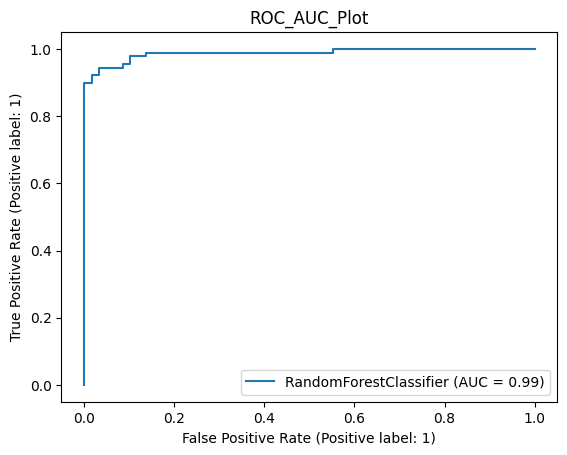

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

classifier_rf.fit(x_train,y_train)
prediction = classifier_rf.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Accuracy :", round(accuracy_score(y_test,prediction),2))
print("Cross Validation Score : ",round(cross_val_score(classifier_rf,x_train,y_train,cv = cv,scoring = 'roc_auc').mean(),2))
print("ROC_AUC Score : ",round(roc_auc_score(y_test,prediction),2))
    
RocCurveDisplay.from_estimator(classifier_rf, x_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()
result.loc[result['model'] == 'RF', 'train_score'] = round(accuracy_score(y_test,prediction),2)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.94      0.96      0.95        89

    accuracy                           0.94       147
   macro avg       0.94      0.93      0.94       147
weighted avg       0.94      0.94      0.94       147



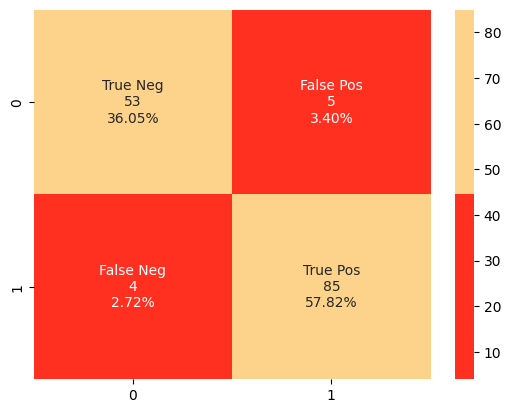

In [41]:
model_evaluation(classifier_rf)

In [42]:
result

model  train_score  test_score
0  Log Regression         0.88           0
1             SVC         0.93           0
2              DT         0.93           0
3              RF         0.94           0

In [43]:
test_lr = classifier_lr.predict(test_X)
test_svc = classifier_svc.predict(test_X)
test_dt = classifier_dt.predict(test_X)
test_rf = classifier_rf.predict(test_X)

In [44]:
result.loc[result['model'] == 'Log Regression', 'test_score'] = round(accuracy_score(test_Y,test_lr),2)
result.loc[result['model'] == 'SVC', 'test_score'] = round(accuracy_score(test_Y,test_svc),2)
result.loc[result['model'] == 'DT', 'test_score'] = round(accuracy_score(test_Y,test_dt),2)
result.loc[result['model'] == 'RF', 'test_score'] = round(accuracy_score(test_Y,test_rf),2)
result

model  train_score  test_score
0  Log Regression         0.88        0.85
1             SVC         0.93        0.85
2              DT         0.93        0.80
3              RF         0.94        0.83

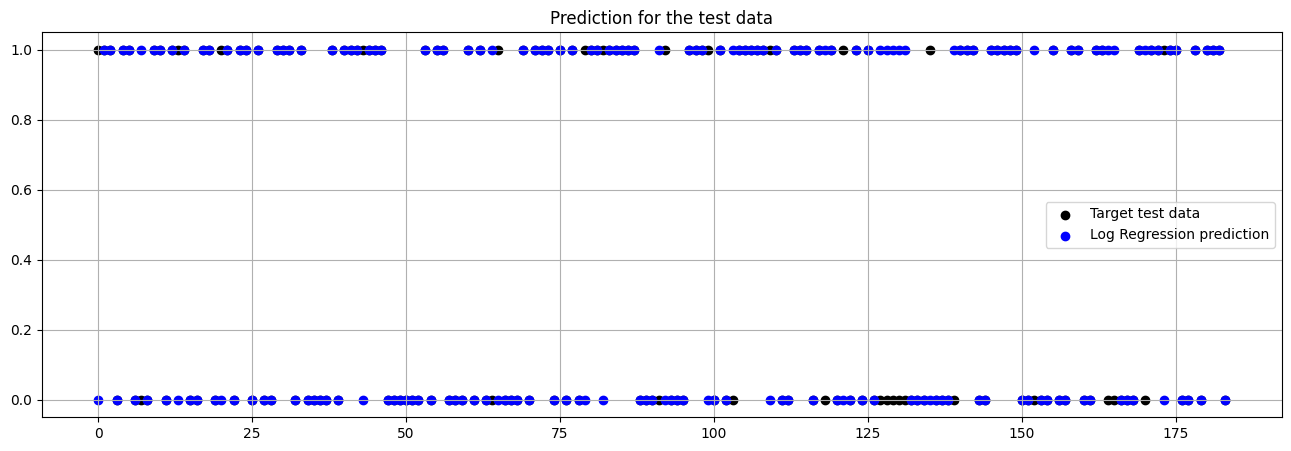

In [45]:
x = np.arange(len(test_Y))
plt.figure(figsize=(16,5))
plt.scatter(x, test_Y, label = "Target test data", color = 'k')
plt.scatter(x, test_lr, label = "Log Regression prediction", color = 'b')

plt.title('Prediction for the test data')
plt.legend(loc='best')
plt.grid(True)

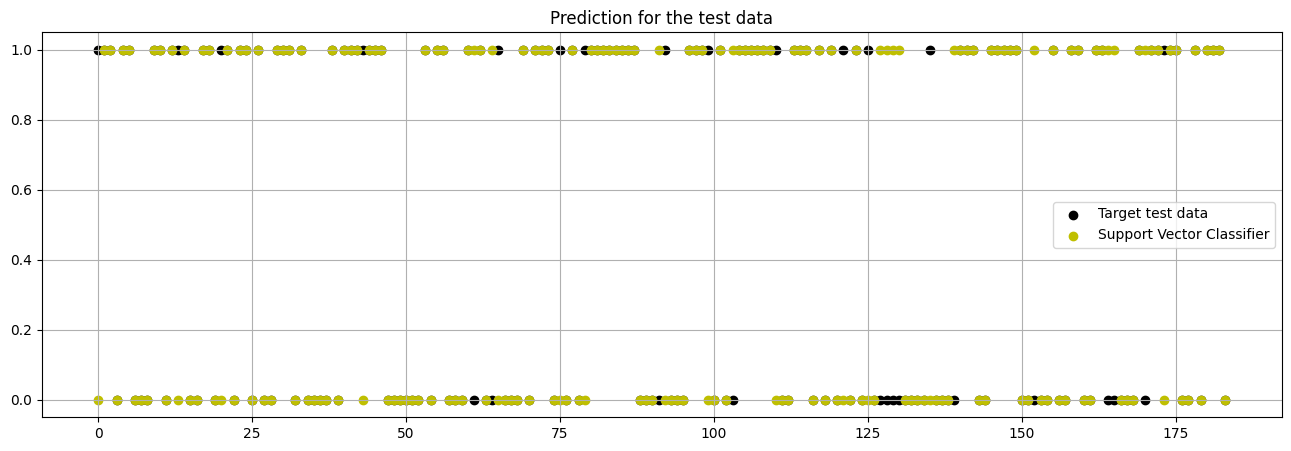

In [46]:
x = np.arange(len(test_Y))
plt.figure(figsize=(16,5))
plt.scatter(x, test_Y, label = "Target test data", color = 'k')
plt.scatter(x, test_svc, label = "Support Vector Classifier", color = 'y')

plt.title('Prediction for the test data')
plt.legend(loc='best')
plt.grid(True)

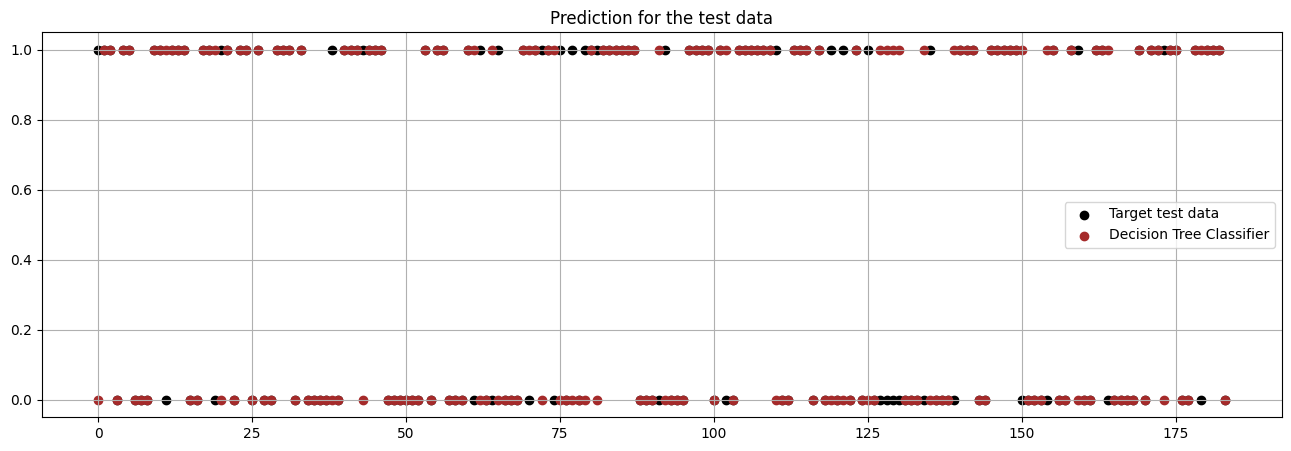

In [47]:
x = np.arange(len(test_Y))
plt.figure(figsize=(16,5))
plt.scatter(x, test_Y, label = "Target test data", color = 'k')
plt.scatter(x, test_dt, label = "Decision Tree Classifier", color = 'brown')

plt.title('Prediction for the test data')
plt.legend(loc='best')
plt.grid(True)

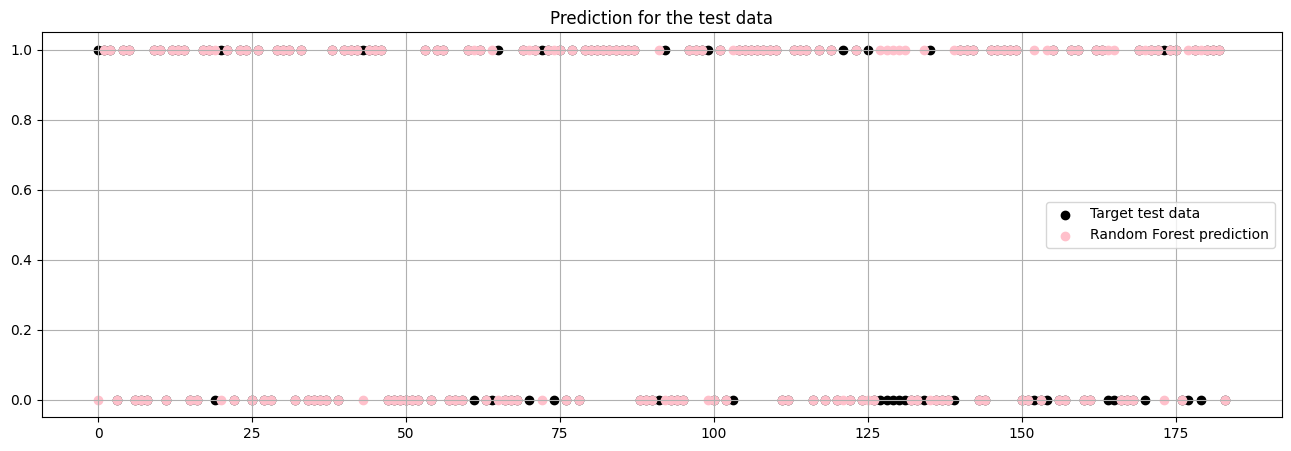

In [48]:
x = np.arange(len(test_Y))
plt.figure(figsize=(16,5))
plt.scatter(x, test_Y, label = "Target test data", color = 'k')
plt.scatter(x, test_rf, label = "Random Forest prediction", color = 'pink')

plt.title('Prediction for the test data')
plt.legend(loc='best')
plt.grid(True)

Best Model

In [49]:
result_best = result[(result['train_score'] - result['test_score']).abs() < 0.05]
result_best.sort_values(by=['test_score', 'train_score'], ascending=False)

model  train_score  test_score
0  Log Regression         0.88        0.85